# TTC Subway Delays — EDA Notebook
_Interactive exploration with Plotly_  

This notebook explores TTC subway delay data with a focus on:
- System-level trends
- Line-level trends (BD, YU, SHP)
- Rush-hour vs Off-peak patterns
- Seasonal variation
- Station-level insights

> Tip: Run cells top-to-bottom on first use.


In [16]:
# --- Imports & Setup ---
import sys, os
sys.path.append(os.path.abspath(".."))  # add project root
from utils.ttc_loader import TTCLoader
import eda_plots as eda
import plotly.io as pio

## Load Data

In [17]:
# --- Load your dataset here ---
loader = TTCLoader()
df = loader.df
df.head()


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station Category,DateTime,IsWeekday,Rush Hour,Season,Delay Category,Delay Description
0,2018-01-01,00:29:00,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986,Passenger,2018-01-01 00:29:00,True,Off-peak: Night,Winter,Mechanical/Infrastructure,ATC PROJECT
1,2018-01-01,01:39:00,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781,Passenger,2018-01-01 01:39:00,True,Off-peak: Night,Winter,Other/Unclear,MISCELLANEOUS OTHER
2,2018-01-01,02:09:00,Monday,KIPLING STATION,MUSAN,3,7,E,BD,5261,Passenger,2018-01-01 02:09:00,True,Off-peak: Night,Winter,Patron,UNSANITARY VEHICLE
3,2018-01-01,02:42:00,Monday,COLLEGE STATION,SUDP,7,12,N,YU,5696,Passenger,2018-01-01 02:42:00,True,Off-peak: Night,Winter,Patron,DISORDERLY PATRON
4,2018-01-01,03:06:00,Monday,WARDEN STATION,MUI,3,7,E,BD,5257,Passenger,2018-01-01 03:06:00,True,Off-peak: Night,Winter,Patron,INJURED/ILL CUSTOMER ON TRAIN TRANSPORTED


In [18]:
# Filter by category
df = loader.filter_category('Mechanical/Vehicle').df
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station Category,DateTime,IsWeekday,Rush Hour,Season,Delay Category,Delay Description
6,2018-01-01,08:41:00,Monday,VICTORIA PARK STATION,EUDO,6,10,W,BD,5030,Passenger,2018-01-01 08:41:00,True,Morning,Winter,Mechanical/Vehicle,DOOR PROBLEMS RE:FAULTY EQUIPMENT
7,2018-01-01,08:46:00,Monday,OLD MILL STATION,EUBK,4,8,E,BD,5069,Passenger,2018-01-01 08:46:00,True,Morning,Winter,Mechanical/Vehicle,BRAKES
13,2018-01-01,16:45:00,Monday,ST. GEORGE STATION,EUDO,10,15,E,BD,5242,Passenger,2018-01-01 16:45:00,True,Evening,Winter,Mechanical/Vehicle,DOOR PROBLEMS RE:FAULTY EQUIPMENT
20,2018-01-01,23:07:00,Monday,YORK MILLS STATION,EUDO,3,8,S,YU,5511,Passenger,2018-01-01 23:07:00,True,Off-peak: Night,Winter,Mechanical/Vehicle,DOOR PROBLEMS RE:FAULTY EQUIPMENT
23,2018-01-02,06:14:00,Tuesday,VAUGHAN METROPOLITAN CENTRE STATION,EUTRD,3,5,S,YU,5676,Passenger,2018-01-02 06:14:00,True,Morning,Winter,Mechanical/Vehicle,TORONTO ROCKET CAB DOORS


In [19]:
# Chain multiple filters
loader.clear_filters()
rush_hour_delays = loader.filter_selected_year(2024).filter_morning_rush_hour().filter_line('YU').df
rush_hour_delays.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station Category,DateTime,IsWeekday,Rush Hour,Season,Delay Category,Delay Description
38104,2024-01-01,08:42:00,Monday,SHEPPARD WEST STATION,TUNIP,6,12,N,YU,6016,Passenger,2024-01-01 08:42:00,True,Morning,Winter,Operational/Process,OPERATOR NOT IN POSTION
38116,2024-01-02,07:40:00,Tuesday,DAVISVILLE STATION,SUDP,6,9,S,YU,6076,Passenger,2024-01-02 07:40:00,True,Morning,Winter,Patron,DISORDERLY PATRON
38117,2024-01-02,08:44:00,Tuesday,ST. CLAIR STATION,PUOPO,6,9,N,YU,5811,Passenger,2024-01-02 08:44:00,True,Morning,Winter,Mechanical/Vehicle,OPTO (COMMUNICATIONS) TRAIN DOOR MONITORING
38118,2024-01-02,08:51:00,Tuesday,DUNDAS STATION,MUSAN,3,6,N,YU,5451,Passenger,2024-01-02 08:51:00,True,Morning,Winter,Patron,UNSANITARY VEHICLE
38141,2024-01-03,07:17:00,Wednesday,DUNDAS STATION,MUPAA,3,6,S,YU,5796,Passenger,2024-01-03 07:17:00,True,Morning,Winter,Patron,PAA NO TROUBLE FOUND


In [20]:
# Clear filters
loader.clear_filters()
df = loader.df

## 1) System-Wide Trends

#### Has the delays increased over the years?

In [21]:
fig= eda.plot_total_delay_by_year(df, unit = "days")
fig.show()


## 2) Spatial and Temporal Patterns Analysis


#### Which subway lines are most delay-prone


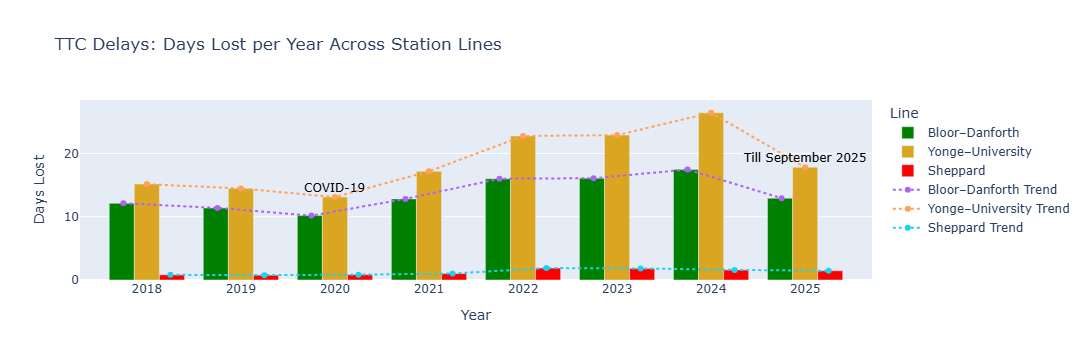

In [22]:
fig= eda.plot_line_trends_by_year(df, unit = "days")
fig.show()


#### When do delays occur most often, during peak or off-peak hours ?

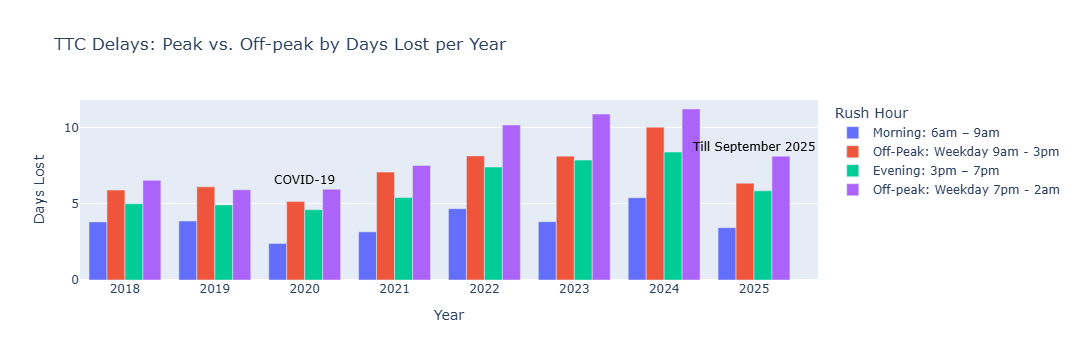

In [23]:
fig= eda.plot_rush_hour_trends_by_year(df, unit = "days")
fig.show()


#### Which season has the most delays?

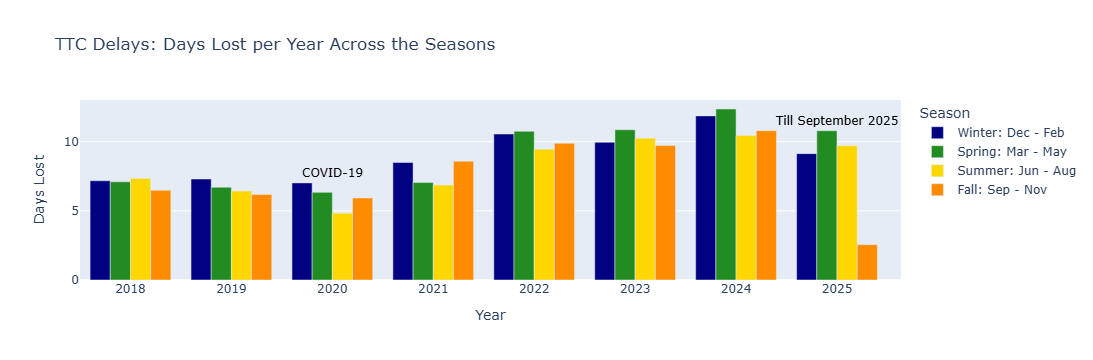

In [24]:
fig= eda.plot_season_trends_by_year(df, unit = "days")
fig.show()

#### Have major delays (>=20) been increasing in occurance? 

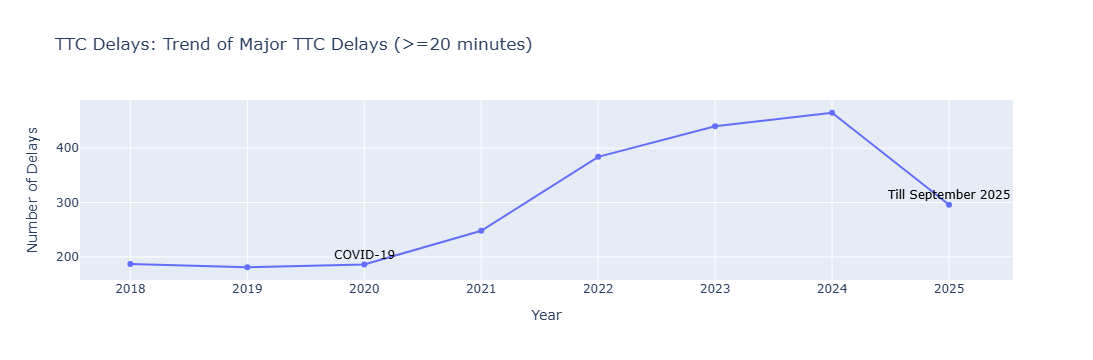

In [25]:
fig= eda.plot_major_delay_trend(df)
fig.show()

#### Have minor delays (< 20 min) been increasing in occurance? 

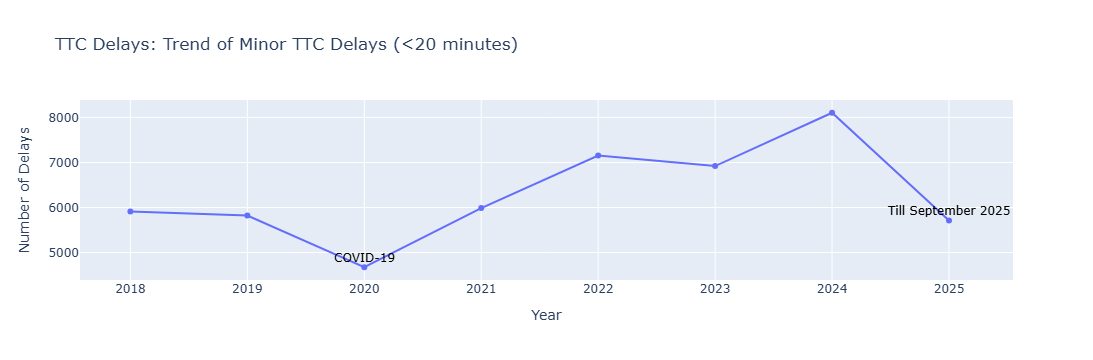

In [26]:
fig= eda.plot_minor_delay_trend(df)
fig.show()